/home/samnub/anaconda3/envs/lircst-diffusion/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Train set size: 14969
Validation set size: 1871
Test set size: 1871
Random dataset index: 826
Showing samples for ECD-Phys...
Is Time embed used ?  True
Loading checkpoint: epoch 199 | step 187200


/home/samnub/anaconda3/envs/lircst-diffusion/lib/python3.13/site-packages/pytorch_lightning/core/module.py:441: You are trying to `self.log()` but the `self.trainer` reference is not registered on the model yet. This is most likely because the model hasn't been passed to the `Trainer`


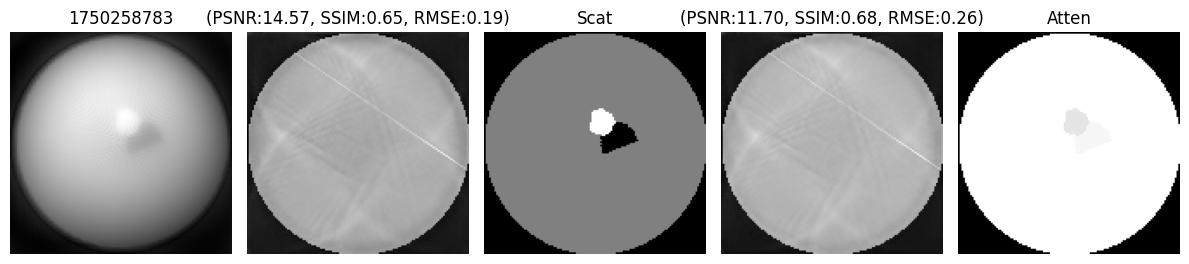

Showing samples for ECD...
Is Time embed used ?  True
Loading checkpoint: epoch 83 | step 78624


AttributeError: 'NoneType' object has no attribute 'A_T'

: 

In [ ]:
# Display some samples from each model
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from encoded_conditional_diffusion import ECDiffusion
from util import get_latest_ckpt, get_dataset, model_args

dataset_train, dataset_valid, dataset_test = get_dataset()

def show_samples(model: ECDiffusion, dataset_idx: int|None=None, num_samples=1):
    phan, sino, phan_id = dataset_test[np.random.randint(0, len(dataset_test)) if dataset_idx is None else dataset_idx]
    #sino = torch.from_numpy(sino)

    batch_input = (torch.stack(num_samples*[phan]).cuda(), 
                   torch.stack(num_samples*[sino]).cuda(), 
                   num_samples*[phan_id])

    model.loss_evaluation(
        batch=batch_input,
        batch_idx=0,
        to_print=True,
    )

random_idx = np.random.randint(0, len(dataset_test))
print(f"Random dataset index: {random_idx}")

for name, model_arg in model_args.items():
    print(f"Showing samples for {name}...")

    model = ECDiffusion.load_from_checkpoint(
        get_latest_ckpt(name)[0],
        **model_arg,
        train_dataset=dataset_train,
        valid_dataset=dataset_valid,
        test_dataset=dataset_test,
    ).cuda()

    show_samples(model, dataset_idx=random_idx)